In [1]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle
from scipy.spatial import KDTree
from scipy.spatial.distance import euclidean
%matplotlib inline

In [2]:
folder_HMF = '/pscratch/sd/j/jialiu/CAMELS/Rockstar/' ### original, unorganized halo catalogue from rockstar
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'
folder_plot = home+'plots/'

cmap = matplotlib.cm.get_cmap('Spectral') #('viridis')#
labels=[r'$\Omega_m$', r'$\sigma_8$', r'$\log_{10}(A_{\rm SN1})$', r'$\log_{10}(A_{\rm AGN1})$', r'$\log_{10}(A_{\rm SN2})$', r'$\log_{10}(A_{\rm AGN2})$']

In [8]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

fidu_params = [ 0.3, 0.8 ,0. ,  0. ,0. ,0.]
iz = 0
iset = '1P'
isim = 'IllustrisTNG'

mbins = linspace(8,16, 17)
dmbin = mbins[1]-mbins[0]
mbins_center = mbins[:-1]+0.5*dmbin


/tmp/ipykernel_1473407/1346771957.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = hmf_arr[:, 6:]/hmf_DM_arr[:, 6:]
/tmp/ipykernel_1473407/1346771957.py:11: RuntimeWarning: invalid value encountered in true_divide
  r = hmf_arr[:, 6:]/hmf_DM_arr[:, 6:]


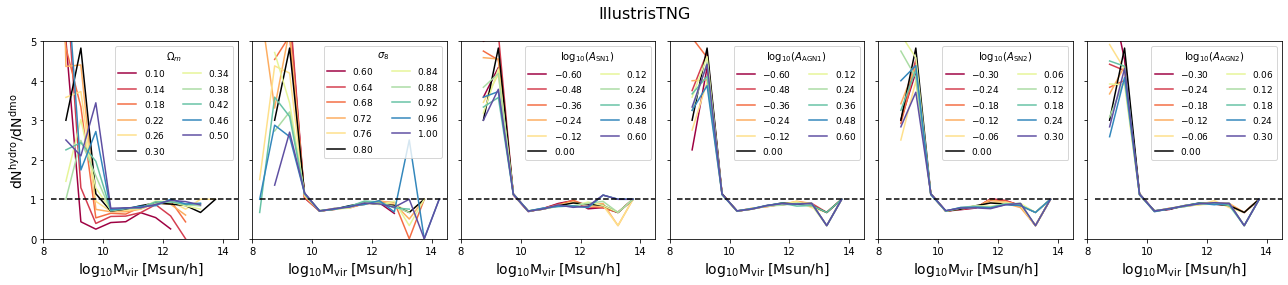

/tmp/ipykernel_1473407/1346771957.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = hmf_arr[:, 6:]/hmf_DM_arr[:, 6:]
/tmp/ipykernel_1473407/1346771957.py:11: RuntimeWarning: invalid value encountered in true_divide
  r = hmf_arr[:, 6:]/hmf_DM_arr[:, 6:]


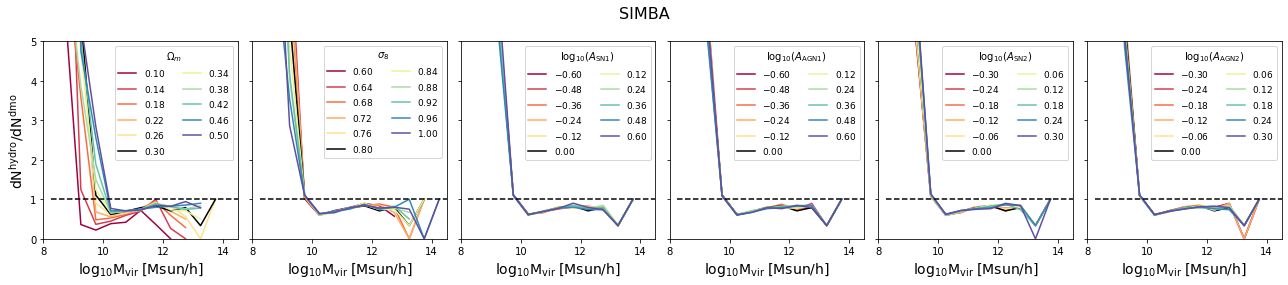

In [15]:
##### HMF plot

for isim in ['IllustrisTNG', 'SIMBA']:
    ifn=home+'halos/%s_%s_z=%.2f.npy'%(isim, iset, iz)
    ifn_DM=home+'halos/%s_%s_z=%.2f_DM.npy'%(isim, iset, iz)
    hmf_arr = np.load(ifn)
    hmf_DM_arr = np.load(ifn_DM)
    hmf_arr.shape

    params = hmf_arr[:, :6]
    r = hmf_arr[:, 6:]/hmf_DM_arr[:, 6:]
    params.shape, hmf_arr.shape

    f, axes=subplots(1, 6, figsize=(18,4))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(mbins_center, r[iidx], c=icolor,label='$%.2f$'%(iparam))
            j+=1
            
        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=9,loc='upper right')
        # ax.set_yscale('log')
        ax.set_ylim(0., 5)
        ax.set_xlim(8,14.5)
        ax.set_xlabel(r'$\rm log_{10} M_{vir} \;[Msun/h]$',fontsize=14)
        ax.plot(mbins_center, ones(len(mbins_center)), 'k--')
        
        if i == 0:
            # ax.set_title(isim,fontsize=14)
            ax.set_ylabel(r'$\rm dN^{hydro}/dN^{dmo}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
    f.suptitle(isim, fontsize=16)        
    plt.subplots_adjust(hspace=0, wspace=0)
    plt.tight_layout()
    f.savefig(folder_plot+'%s_HMF_ratio.pdf'%(isim))
    show()